In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('1850-2025.csv')
df.shape
print(df.head())

     Date  Anomaly
0  185001    -0.45
1  185002    -0.20
2  185003    -0.21
3  185004    -0.35
4  185005    -0.29


In [3]:
# Convert 'Date' from int YYYYMM to datetime
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')

# Display the first few rows to verify the conversion
print(df.head())

AnomalyData = df
AnomalyData.set_index('Date', inplace=True)


        Date  Anomaly
0 1850-01-01    -0.45
1 1850-02-01    -0.20
2 1850-03-01    -0.21
3 1850-04-01    -0.35
4 1850-05-01    -0.29


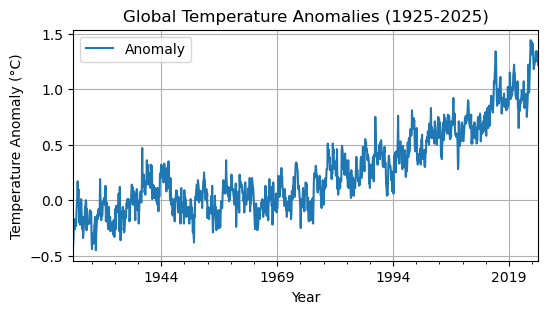

In [4]:
#group data of the last 100 years
century = AnomalyData.loc["1925-01-01":"2025-04-01"]
# Plotting the data
plot = century.plot(figsize=(6, 3), title='Global Temperature Anomalies (1925-2025)')
plt.xlabel('Year') 
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


This is a plot of the global temoerature anomalies over the last century. 

What is a temperature anomaly? 

A temperature anomaly is the difference between an observed temperature and a base temperature which is usually a long term average.

In this line plot we see that there is a definite increase in the value of the anomalies over the past century. Its still quite hard to see if there are any trends in this data due to the yearly fluctuations. to solve this we will need to make a rolling mean plot. 

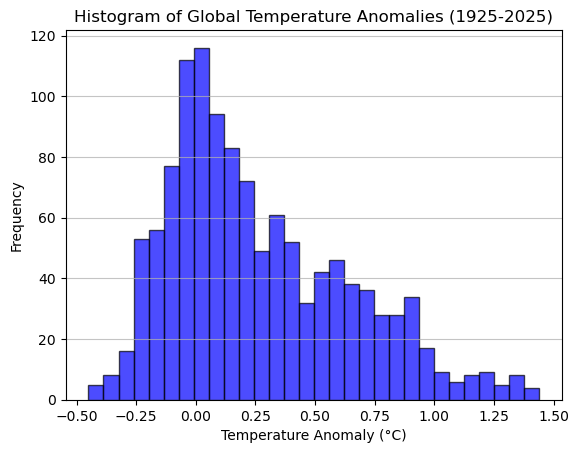

In [5]:
century['Anomaly'].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Global Temperature Anomalies (1925-2025)')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram shows the distribution of anomalies over the past century, we can see here that majority of the recordings where close to a 0 degree change which would make sense because the temperature should always be close to the long term average. 

The recent increase in temperature has resulted in higher anomalies at an increasing rate, approximately starting around 1979. The increase could be easily neglected by saying its natural disasters causing the temperatures to rise or fall. This increase has been over a long period of time unlike the somewhat steady change prior to 1979. 

Its true that natural disasters cause dramatic temperature fluctuations but no constant rise over long periods of time.

Seeing this increase in temperature was a real eye opener to what people were doing to the planet and resulted in many efforts to educate and discover about global warming. 

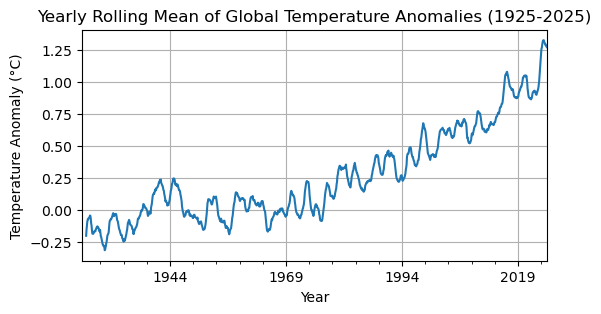

In [6]:
rolling_mean_year = century['Anomaly'].rolling(window=12).mean()
rolling_mean_year.plot(figsize=(6, 3), title='Yearly Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

This plot is a yearly mean anomaly plot over the last century. Using a rolling mean helps a lot with finding any trends in the data. here we see a very rapid increase in recent years and a large increase and decrease of average temperature around 1944. This data can still be pretty hard to read because of all the different fluctuations and its still pretty noisy.

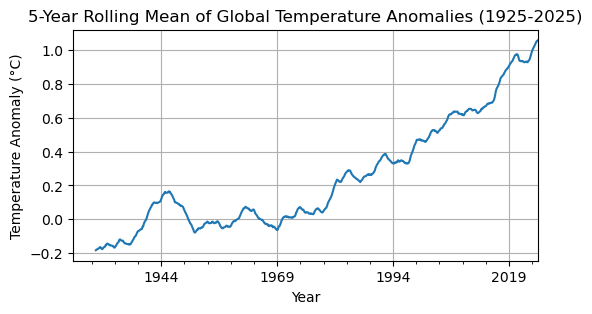

In [7]:
rolling_mean_5years = century['Anomaly'].rolling(window=60).mean()
rolling_mean_5years.plot(figsize=(6, 3), title='5-Year Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

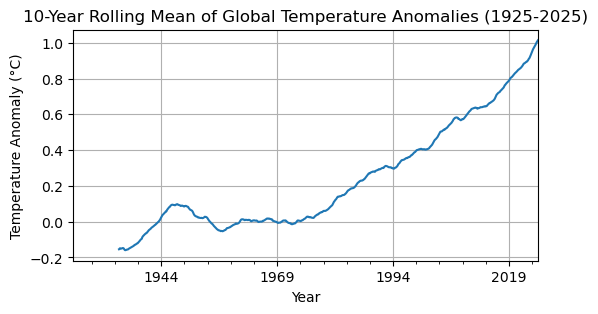

In [8]:
rolling_mean_10years = century['Anomaly'].rolling(window=120).mean()
rolling_mean_10years.plot(figsize=(6, 3), title='10-Year Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

In [9]:
summary_stats = century.describe()
print("Summary Statistics of Global Temperature Anomalies (1925-2025):" + str(summary_stats.round(2)))

Summary Statistics of Global Temperature Anomalies (1925-2025):       Anomaly
count  1204.00
mean      0.26
std       0.38
min      -0.45
25%      -0.02
50%       0.17
75%       0.52
max       1.44


***STATISTICAL ANALYSIS AND MODELLING***

In [15]:

yearly_df = century['Anomaly'].resample('YE').mean().reset_index()

yearly_df['Year'] = yearly_df['Date'].dt.year

print(yearly_df.head())


        Date   Anomaly  Year
0 1925-12-31 -0.203333  1925
1 1926-12-31 -0.071667  1926
2 1927-12-31 -0.167500  1927
3 1928-12-31 -0.157500  1928
4 1929-12-31 -0.315833  1929


In [20]:
from sklearn.linear_model import LinearRegression

X = yearly_df['Year'].to_numpy().reshape(-1, 1)
y = yearly_df['Anomaly'].to_numpy()

model = LinearRegression()
model.fit(X, y)

yearly_df['Predicted'] = model.predict(X)


In [17]:
model_slope = model.coef_[0]
model_intercept = model.intercept_

print("Slope of the linear regression model:", model_slope, "°C per year")
print("Intercept of the linear regression model:", model_intercept, "°C")
print("R-squared of the linear regression model:", model.score(X, y))
print("Warming per decade:", model_slope * 10, "°C per decade")

Slope of the linear regression model: 0.011452601436614248 °C per year
Intercept of the linear regression model: -22.350785527082117 °C
R-squared of the linear regression model: 0.8025004870463748
Warming per decade: 0.11452601436614249 °C per decade


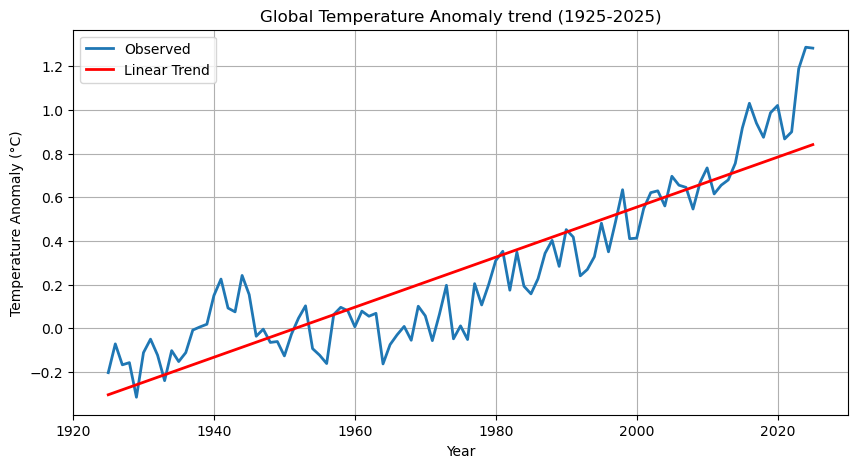

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_df['Year'], yearly_df['Anomaly'], label='Observed', linewidth=2)
plt.plot(yearly_df['Year'], yearly_df['Predicted'], label='Linear Trend', color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly trend (1925-2025)')
plt.legend()
plt.grid(True)
plt.show()
